# Initial housing_data EDA

## Setup

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline 
sns.set(style="dark",palette="deep")
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

In [56]:
df = pd.read_csv("../data/housing_data.csv", index_col="id")

## Exploring data

In [57]:
df.head()

,areas,bedrooms,bathrooms,parkingSpots,prices,type,neighborhood
id,,,,,,,
2669329904,324.0,5.0,3.0,4.0,340000.0,house,Sao Tome
2667338201,51.0,2.0,1.5,1.0,295000.0,NaN,Santa Teresa
2643720430,94.0,3.0,4.0,2.0,629000.0,apartment,Cidade Jardim
2681509397,66.0,2.0,2.0,2.0,460000.0,apartment,Imbuí
2671493238,82.0,3.0,3.0,2.0,649990.0,apartment,Piatã


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1984 entries, 2669329904 to 2639465330
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   areas         1984 non-null   float64
 1   bedrooms      1975 non-null   float64
 2   bathrooms     1977 non-null   float64
 3   parkingSpots  1665 non-null   float64
 4   prices        1979 non-null   float64
 5   type          1963 non-null   object 
 6   neighborhood  1984 non-null   object 
dtypes: float64(5), object(2)
memory usage: 124.0+ KB


Areas are set in m² and Prices are in BRL.

In [59]:
df.describe()

,areas,bedrooms,bathrooms,parkingSpots,prices
count,1984.000000,1975.000000,1977.000000,1665.000000,1.979000e+03
mean,140.487903,2.399241,1.657056,1.391592,2.363543e+05
std,1473.060753,1.264220,0.933786,1.723474,1.560348e+06
min,23.000000,1.000000,1.000000,1.000000,2.999900e+04
25%,67.000000,2.000000,1.000000,1.000000,5.500000e+04
50%,79.000000,2.000000,1.000000,1.000000,8.000000e+04
75%,90.000000,3.000000,2.000000,2.000000,1.490000e+05
max,60000.000000,50.000000,18.000000,50.000000,5.928620e+07


In [60]:
df[df.areas > 2000]

,areas,bedrooms,bathrooms,parkingSpots,prices,type,neighborhood
id,,,,,,,
2676319747,22670.0,NaN,NaN,NaN,12500000.0,NaN,Cia Aeroporto
2663191661,60000.0,2.0,1.0,1.0,65000.0,house,São Marcos
2682226401,5403.0,NaN,NaN,NaN,25000000.0,NaN,BA
2518494985,2500.0,50.0,12.0,20.0,9000000.0,NaN,Armação
2473021950,7500.0,NaN,NaN,NaN,18000000.0,NaN,BA
2656624394,10821.0,NaN,NaN,NaN,2200000.0,NaN,Cassange


Areas > 2000 Will be removed since they might not be House/Apartment or might be bad input.

In [61]:
df[df.prices > 10000000]

,areas,bedrooms,bathrooms,parkingSpots,prices,type,neighborhood
id,,,,,,,
2676319747,22670.0,NaN,NaN,NaN,12500000.0,NaN,Cia Aeroporto
2682226401,5403.0,NaN,NaN,NaN,25000000.0,NaN,BA
2682843782,66.0,2.0,2.0,1.0,59286200.0,apartment,Piatã
2473021950,7500.0,NaN,NaN,NaN,18000000.0,NaN,BA


For now, we'll drop immensely high prices

We'll drop any rows without price too

In [62]:
df = df[~(df.prices.isna())]
df = df[~(df.prices > 10000000)]
df.describe()

,areas,bedrooms,bathrooms,parkingSpots,prices
count,1975.000000,1970.000000,1972.000000,1660.000000,1.975000e+03
mean,122.941013,2.400508,1.656694,1.391566,1.787134e+05
std,1371.448557,1.265132,0.934181,1.725859,3.509878e+05
min,23.000000,1.000000,1.000000,1.000000,2.999900e+04
25%,67.000000,2.000000,1.000000,1.000000,5.500000e+04
50%,79.000000,2.000000,1.000000,1.000000,8.000000e+04
75%,90.000000,3.000000,2.000000,2.000000,1.457500e+05
max,60000.000000,50.000000,18.000000,50.000000,9.000000e+06


### Numerical columns

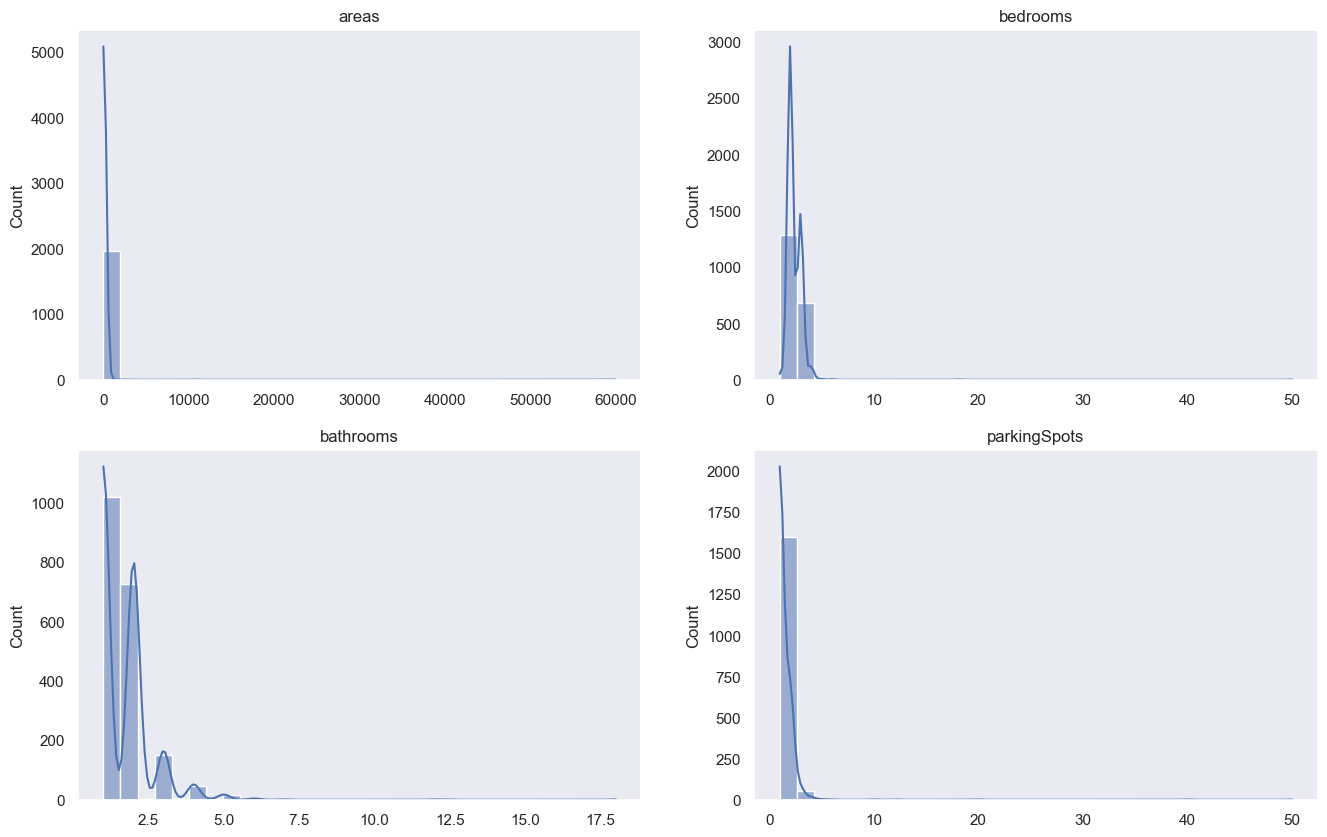

In [63]:
categories = np.reshape(["areas", "bedrooms", "bathrooms", "parkingSpots"], (2,2))

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

for i in range(2):
    for j in range(2):
        axs[i][j].set_title(categories[i][j])
        sns.histplot(x=df[categories[i][j]], bins=30, ax=axs[i][j], kde=True).set(xlabel=None)

There where a few registers in the discrete columns (i.e. bathrooms, parkingSpots and bedrooms) that where labeled "x-y" (e.g. "2-4" bedrooms),
 so when processing the scraped data, we took the mean of these values.

For now, we'll drop values far from the central tendency arbitrarily

In [64]:
df = df[~(df.areas > 200)]
df = df[~(df.bedrooms > 5)]
df = df[~(df.bathrooms > 5)]
df = df[~(df.parkingSpots > 5)]

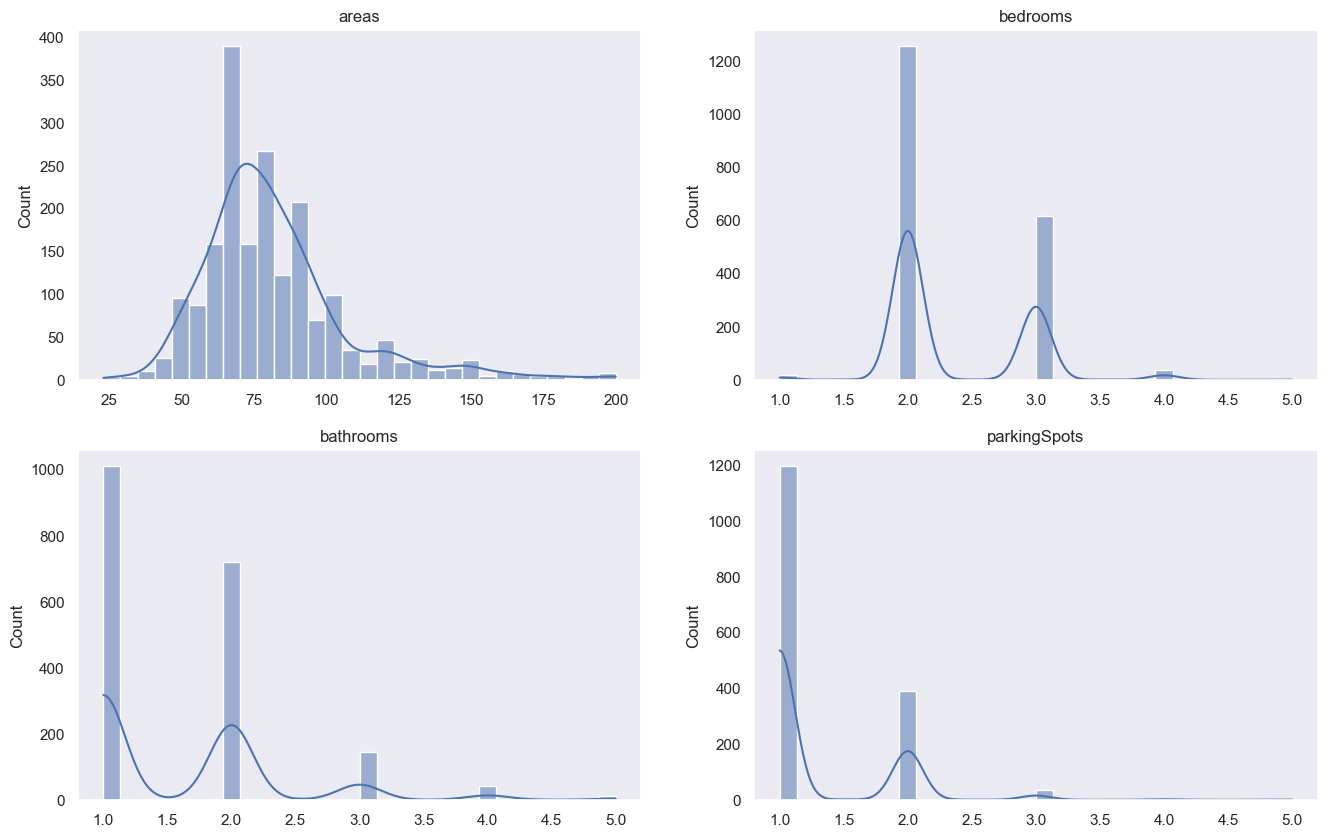

In [65]:
categories = np.reshape(["areas", "bedrooms", "bathrooms", "parkingSpots"], (2,2))

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

for i in range(2):
    for j in range(2):
        axs[i][j].set_title(categories[i][j])
        sns.histplot(x=df[categories[i][j]], bins=30, ax=axs[i][j], kde=True).set(xlabel=None)

### Prices

Text(0.5, 1.0, 'Housings under R$ 700,000')

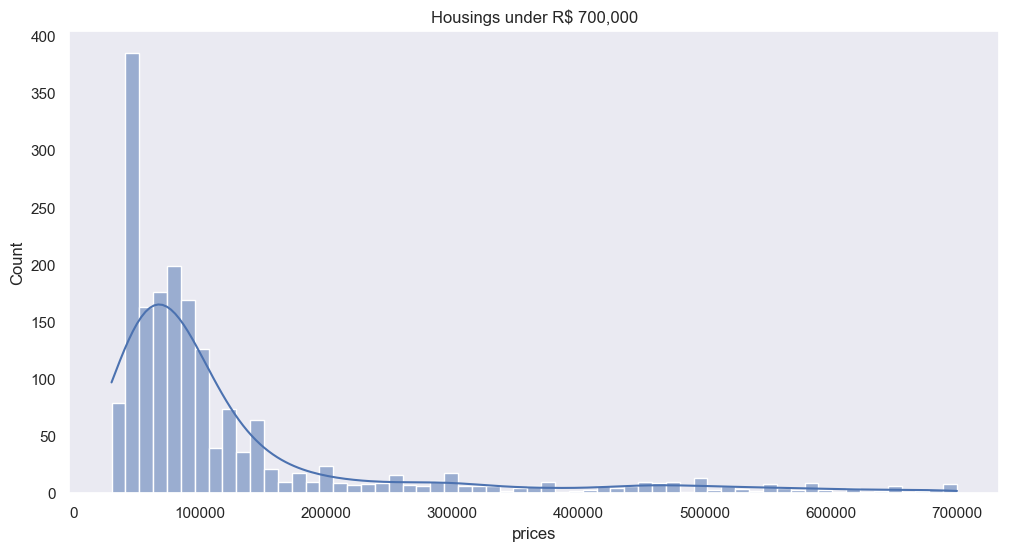

In [66]:
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain', axis='x')
sns.histplot(x=df[df.prices < 700000].prices, kde=True).set_title("Housings under R$ 700,000")

Text(0.5, 1.0, 'Housings over R$ 700,000')

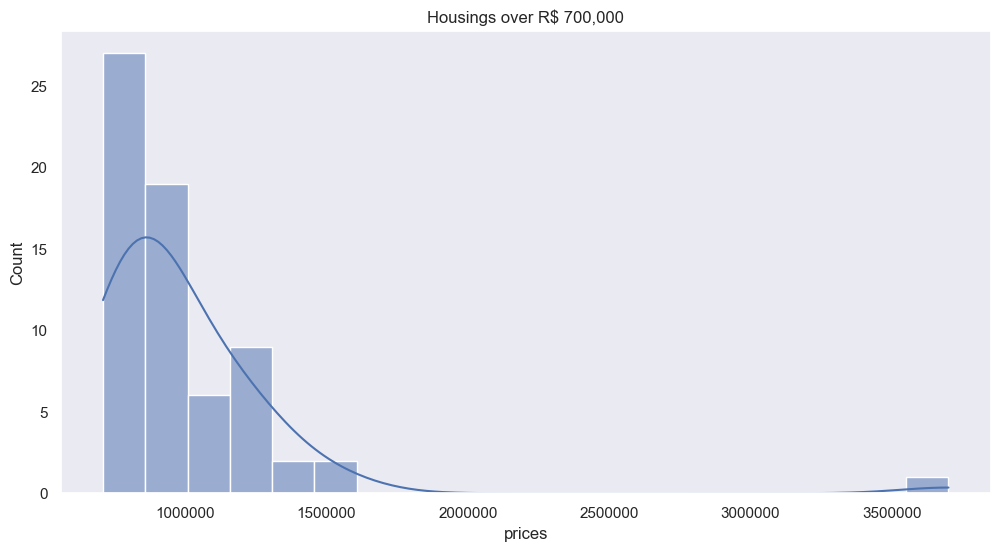

In [67]:
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain', axis='x')
sns.histplot(x=df[df.prices > 700000].prices, kde=True).set_title("Housings over R$ 700,000")

### Categorical Columns

In [68]:
df.neighborhood.value_counts()

neighborhood
Ribeira                                          93
Itapuã                                           79
Paripe                                           63
Pernambués                                       56
Sao Caetano                                      45
Boca do Rio                                      43
Liberdade                                        37
Castelo Branco                                   35
Imbuí                                            32
Plataforma                                       31
Pituba                                           31
Cabula VI                                        30
BA                                               29
Pituaçu                                          29
Engenho Velho de Brotas                          29
Uruguai                                          27
Bonfim                                           27
Iapi                                             26
Dom Avelar                                       26

'BA' seems to be a parsing error due to lack of neighborhood on the raw data (BA stands for Bahia, which is the state, not the neighborhood). We'll set that as NaN.

In [69]:
df.neighborhood = df.neighborhood.apply(lambda x: np.nan if x == "BA" else x)

<Axes: xlabel='type', ylabel='count'>

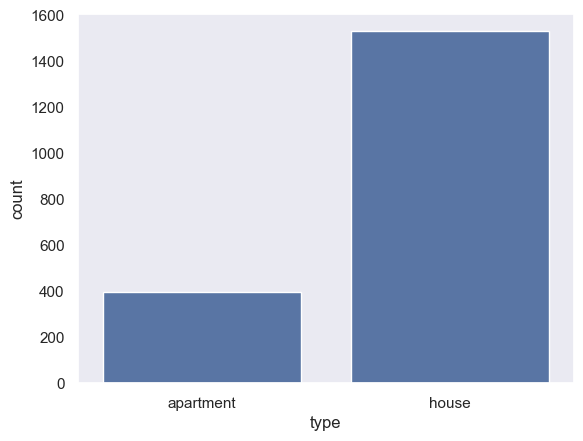

In [70]:
sns.countplot(x=df.type)

### Houses vs Apartments

In [71]:
df[df.type == "apartment"].describe()

,areas,bedrooms,bathrooms,parkingSpots,prices
count,396.000000,396.000000,396.000000,361.000000,3.960000e+02
mean,79.829545,2.460859,2.227273,1.502770,4.501748e+05
std,27.833103,0.654378,0.978950,0.583327,3.361474e+05
min,29.000000,1.000000,1.000000,1.000000,2.999900e+04
25%,63.000000,2.000000,2.000000,1.000000,2.100000e+05
50%,74.000000,2.000000,2.000000,1.000000,3.850000e+05
75%,88.000000,3.000000,3.000000,2.000000,5.915000e+05
max,200.000000,4.000000,5.000000,4.000000,3.700000e+06


In [72]:
df[df.type == "house"].describe()

,areas,bedrooms,bathrooms,parkingSpots,prices
count,1530.000000,1530.000000,1530.000000,1261.000000,1530.000000
mean,82.395425,2.324183,1.456209,1.232355,84156.092810
std,24.644493,0.500624,0.611406,0.485439,57000.443857
min,23.000000,1.000000,1.000000,1.000000,30000.000000
25%,68.000000,2.000000,1.000000,1.000000,50000.000000
50%,80.000000,2.000000,1.000000,1.000000,70000.000000
75%,90.000000,3.000000,2.000000,1.000000,96875.000000
max,200.000000,5.000000,5.000000,5.000000,770000.000000


### Prices vs Areas

<Axes: xlabel='areas', ylabel='prices'>

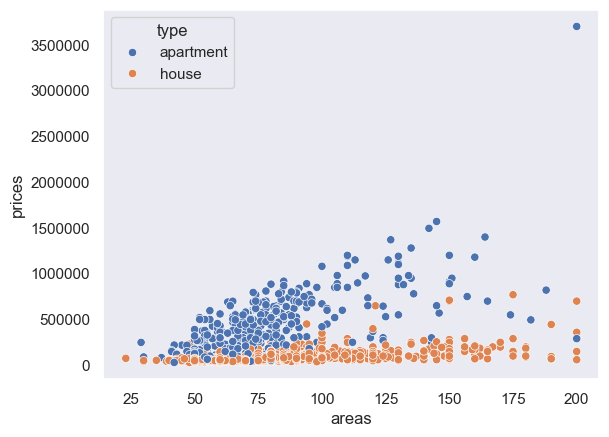

In [73]:
plt.ticklabel_format(style='plain')
sns.scatterplot(x=df.areas, y=df.prices, hue=df.type)

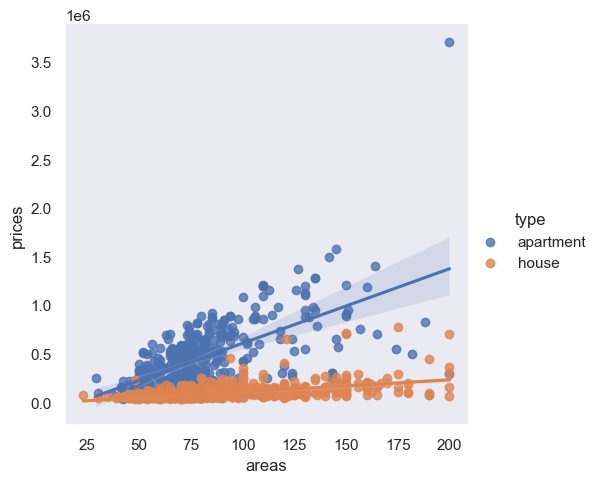

In [74]:
sns.lmplot(data=df, x="areas", y="prices", hue="type")

Apartments' price/area relationship is way more steep than houses'.

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Area'),
 Text(0.5, 1.0, 'Price vs Area (Houses)')]

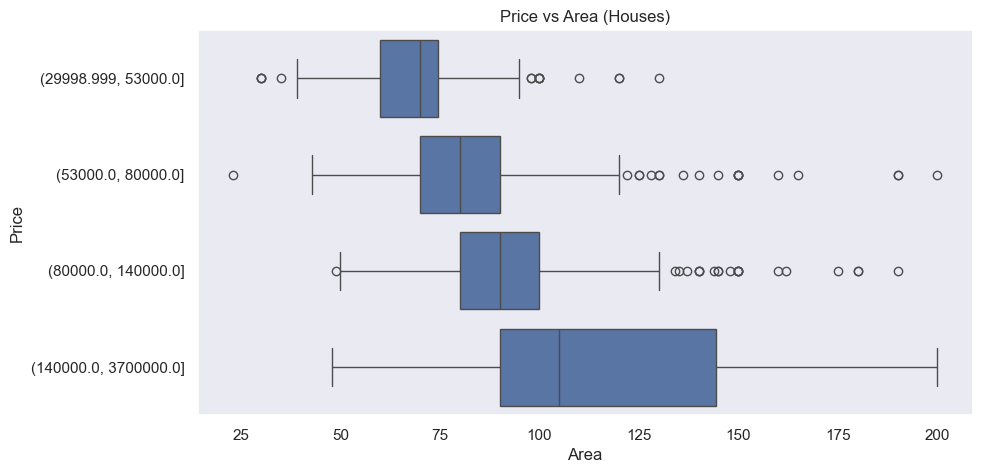

In [75]:
df1 = df.copy()
df1['prices_bins'] = pd.qcut(df.prices, q=[0, .25, .5, .75, 1], duplicates='drop')

plt.figure(figsize=(10,5))
sns.boxplot(x=df1[df1.type == "house"].areas, y=df1[df1.type == "house"].prices_bins).set(
    ylabel="Price", xlabel="Area", title="Price vs Area (Houses)")

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Area'),
 Text(0.5, 1.0, 'Price vs Area (Apartments)')]

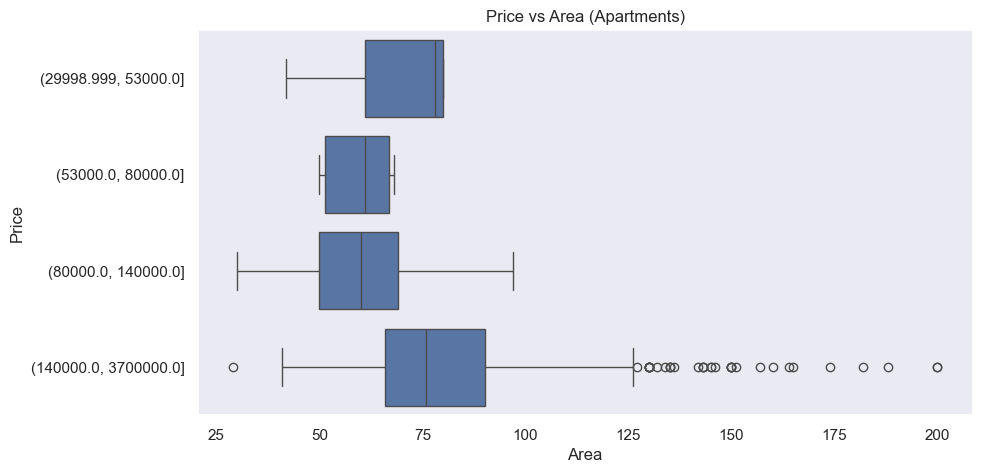

In [76]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1[df1.type == "apartment"].areas, y=df1[df1.type == "apartment"].prices_bins).set(
    ylabel="Price", xlabel="Area", title="Price vs Area (Apartments)")

The odd distribution here might be due to lack of apartment data.

### Prices vs Other Features

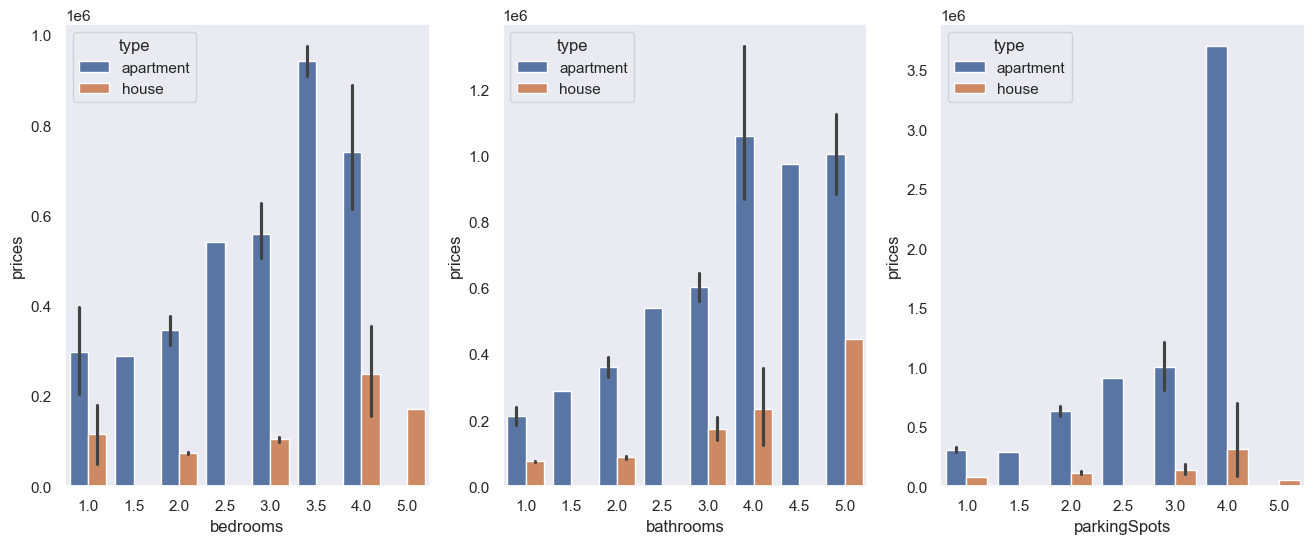

In [77]:
categories = ["bedrooms", "bathrooms", "parkingSpots"]

fig, ax = plt.subplots(1, 3, figsize=(16, 6))

for i in range(3):
    sns.barplot(x=df[categories[i]], y=df.prices, hue=df.type, ax=ax[i])